In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [17]:
#load data
data = load_breast_cancer()
tnames = data['target_names']
t = data['target']
fname = data['feature_names']
f = data['data']

In [18]:
#check for missing values
df_features = pd.DataFrame(f, columns = fname)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [19]:
df_target = pd.DataFrame(t, columns=['target'])
df = pd.concat([df_features, df_target], axis=1)

In [20]:
tnames

array(['malignant', 'benign'], dtype='<U9')

In [21]:
df = pd.concat([df_features, df_target], axis=1)
df['target'] = df['target'].apply(lambda x: "Benign" if x == 1 else "Malignant")

In [22]:
df['target'].value_counts()

Benign       357
Malignant    212
Name: target, dtype: int64

<AxesSubplot:>

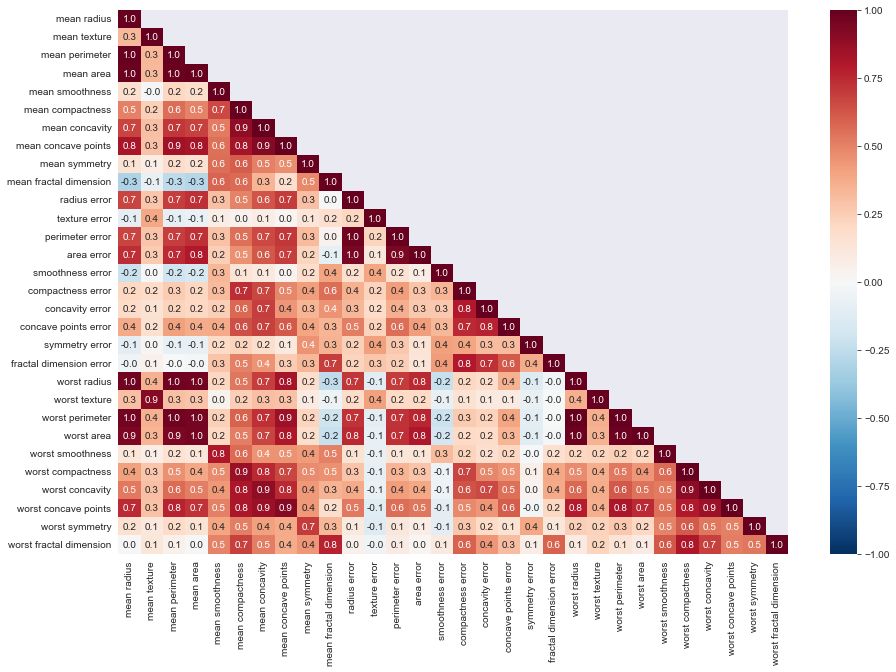

In [23]:
# Create correlation matrix
corr_mat = df.corr()
sns.set_style('darkgrid')
# Create mask
mask = np.zeros_like(corr_mat, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, fmt='.1f', cmap='RdBu_r', vmin=-1, vmax=1, mask=mask)


<AxesSubplot:>

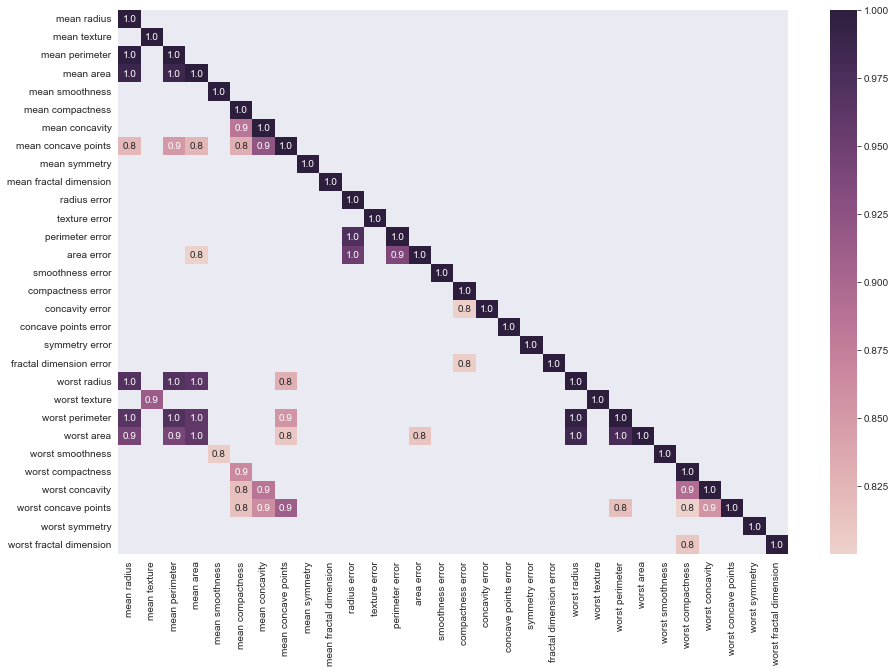

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat[corr_mat > 0.8], annot=True, fmt='.1f', cmap=sns.cubehelix_palette(200), mask=mask)

In [10]:
from sklearn.feature_selection import SelectKBest, chi2
feature_selection = SelectKBest(chi2, k=5)
feature_selection.fit(df_features, df_target)
selected_features = df_features.columns[feature_selection.get_support()]
list(selected_features)

['mean perimeter', 'mean area', 'area error', 'worst perimeter', 'worst area']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(f, t, test_size = 0.33, random_state = 42)

In [12]:
from sklearn.ensemble import RandomForestClassifier

forest_cls = RandomForestClassifier()
forest_cls.fit(X_train,y_train)
pred = forest_cls.predict(X_test)

In [13]:
pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [14]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))

Mean Absolute Error: 0.0425531914893617


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, pred))

Confusion Matrix:
 [[ 63   4]
 [  4 117]]


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.97      0.97      0.97       121

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188

